## Nearest neighbor and the curse of dimensionality

In [2]:
import numpy as np
from sklearn import datasets

iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

### 1. k-Nearest neighbors classifier

- np.random.permutation(n) -> interger(n)를 np.arange를 통해 array로 만들어준 값을 셔플하여 나타내어 준다. 
    - integer -> ndarray -> shuffle


In [12]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-10]] ## 10개 제외 모두 train데이터
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]] ## 나머지 10개는 test데이터
iris_y_test = iris_y[indices[-10:]]

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

print("예측값:", knn.predict(iris_X_test))
print("실제값:", iris_y_test)

예측값: [1 2 1 0 0 0 2 1 2 0]
실제값: [1 1 1 0 0 0 2 1 2 0]


## Linear model: from regression to sparsity

### 1. Linear regression

In [77]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [78]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
regr.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [79]:
sse = (regr.predict(diabetes_X_test) - diabetes_y_test)**2
mse = np.mean(sse)
mse

2004.5676026898211

In [80]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690574

### 2. Shrinkage

- np.c_[a,b]  ~> 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
- np.r_[[a], [b]] ~> 두 배열을 위에서 아래로 붙이기
- np.r_[a, b] ~> 두 배열을 왼쪽에서 오른쪽으로 붙이기 
- .T -> Transpose

In [81]:
import matplotlib.pyplot as plt 

X = np.c_[.5,1].T # 0.5 == .5
y = [.5, 1]
test = np.c_[ 0, 2].T

print("X:", X,"\n")
print("y:", y,"\n")
test

X: [[0.5]
 [1. ]] 

y: [0.5, 1] 



array([[0],
       [2]], dtype=int32)

- 일반 linear regression
    - SSE를 최소화

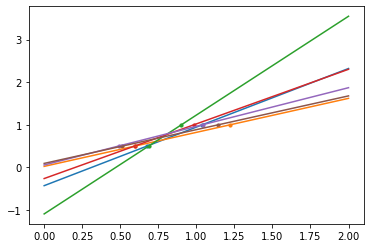

In [74]:
regr = linear_model.LinearRegression()

plt.figure()
np.random.seed(0)

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=10)   # s = size

- Ridge Linear Regression
    - SSE + alpha*회귀계수를 최소화
    - 다중공선성 높은 변수의 계수를 최소화한다
    - alpha를 키울수록 편차는 커지고 분산은 작아진다

array([0.5274436])

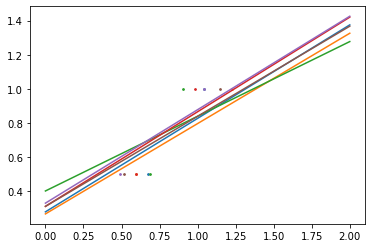

In [88]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)

for _ in range(6): 
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3) 

- alpha에 따라서 최종 score가 달라진다

In [85]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
      .fit(diabetes_X_train, diabetes_y_train)
      .score(diabetes_X_test, diabetes_y_test)
      for alpha in alphas])

[0.5851110683883529, 0.5852073015444674, 0.585467754069849, 0.5855512036503914, 0.583071708555416, 0.5705899943728008]


### 3. Sparsity

- Lasso
    - ridge는 계수를 0에 수렴시키지만
    - lasso는 계수를 0으로 만들수도 있다

In [87]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
          .fit(diabetes_X_train, diabetes_y_train)
          .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha ## regr의  hyper-parameter를 이렇게 세팅 가능
regr.fit(diabetes_X_train, diabetes_y_train)
regr.coef_

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

### 4. Classification

In [89]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

- Exercise

    - Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

In [123]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max() ## 전부 1 이하로 만들어주기 위해서

train_X = X_digits[:-int(X_digits.shape[0]/10)]
train_y = y_digits[:-int(y_digits.shape[0]/10)]
test_X = X_digits[-int(X_digits.shape[0]/10):]
test_y = y_digits[-int(y_digits.shape[0]/10):]

knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(train_X, train_y)
knn_score = knn_clf.score(test_X, test_y)

lin_clf = linear_model.RidgeClassifier()
lin_clf.fit(train_X, train_y)
lin_score = lin_clf.score(test_X, test_y)

log_clf = linear_model.LogisticRegression()
log_clf.fit(train_X, train_y)
log_score = log_clf.score(test_X, test_y)

knn_score, lin_score, log_score

C:\Users\Jang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9608938547486033, 0.8770949720670391, 0.9329608938547486)

## Support vector machines (SVMs)

In [126]:
from sklearn import svm

def score(svc):
    svc.fit(iris_X_train, iris_y_train)
    print(svc.score(iris_X_test, iris_y_test))

svc = svm.SVC(kernel='linear')
score(svc)

svc2 = svm.SVC(kernel='linear')
score(svc2)

svc3 = svm.SVC(kernel='poly', degree=3)
score(svc3)

svc4 = svm.SVC(kernel='rbf')
score(svc3)

0.9
0.9
0.9
0.9
